# Exercise 5: Data exploration exercise
Goal: Determine what you want to use as descriptors for linear regression of the concrete data

1. Download and open the concrete data set: "https://www.kaggle.com/datasets/maajdl/yeh-concret-data"
2. Look at distributions of different descriptors
3. Describe in words what you notice

In [496]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
%matplotlib inline

In [497]:
df = pd.read_csv("./Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# mean and standard deviation for each attribute

In [498]:
cement_avg = np.mean(df.cement)
slag_avg = np.mean(df.slag)
flyash_avg = np.mean(df.flyash)
spr_plast_avg = np.mean(df.superplasticizer)
coarse_agg_avg = np.mean(df.coarseaggregate)
fine_agg_avg = np.mean(df.fineaggregate)
age_avg = np.mean(df.age)
csMPa_avg = np.mean(df.csMPa)

cement_std = np.std(df.cement)
slag_std = np.std(df.slag)
flyash_std = np.std(df.flyash)
spr_plast_std = np.std(df.superplasticizer)
coarse_agg_std = np.std(df.coarseaggregate)
fine_agg_std = np.std(df.fineaggregate)
age_std = np.std(df.age)
csMPa_std = np.std(df.csMPa)

# histograms of each attribute

Cement average:  281.17 ± 104.46


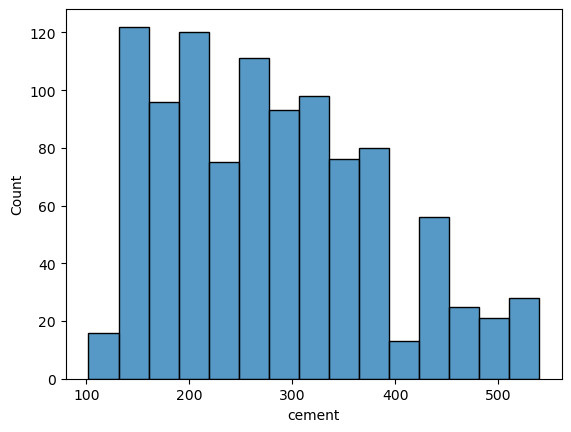

In [499]:
sns.histplot(df.cement)
print("Cement average: ", "{:.2f}".format(cement_avg), u"\u00B1", "{:.2f}".format(cement_std))

The cement attribute data distribution is right-skewed

Slag average:  73.90 ± 86.24


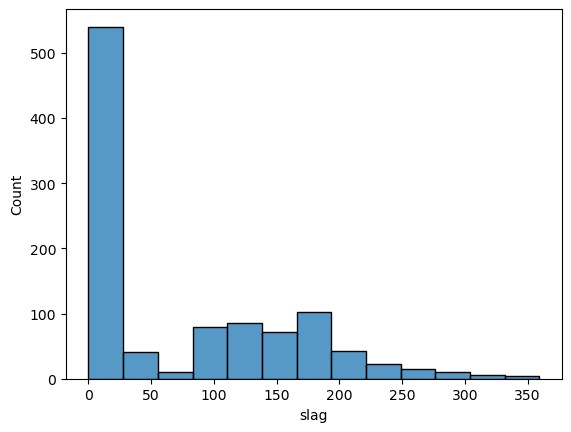

In [500]:
sns.histplot(df.slag)
print("Slag average: ", "{:.2f}".format(slag_avg), u"\u00B1", "{:.2f}".format(slag_std))

With the exception of the first bin, the distribution of the slag data looks normal. However, the first bin makes up a major portion of the data which also explains the large standard deviation relative to the mean 

Flyash average:  54.19 ± 63.97


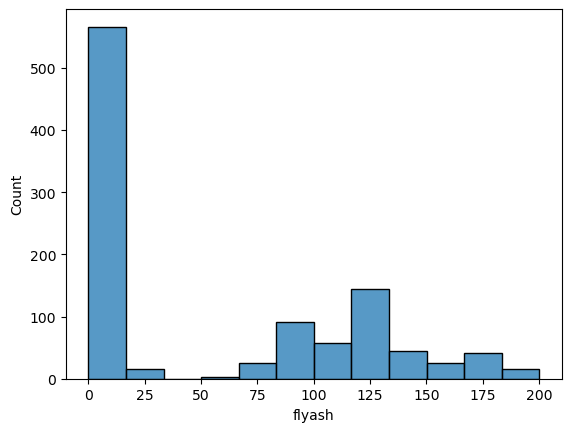

In [501]:
sns.histplot(df.flyash)
print("Flyash average: ", "{:.2f}".format(flyash_avg), u"\u00B1", "{:.2f}".format(flyash_std))


Similar to the slag distribution, where the leftmost bin makes up a large portion of the data. Without this bin, the rest of the distribution would seem to be relatively uniform


Superplasticizer average:  6.20 ± 5.97


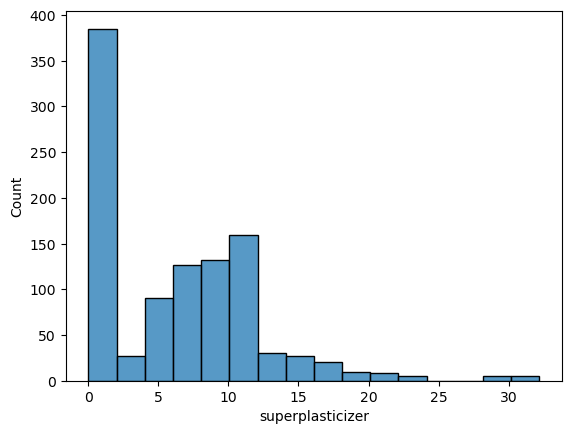

In [502]:
sns.histplot(df.superplasticizer)
print("Superplasticizer average: ", "{:.2f}".format(spr_plast_avg), u"\u00B1", "{:.2f}".format(spr_plast_std))


Partially similar to the two distributions above in that the first bin makes up a large portion of the data -  the remaining distribution seems to be right skewed. 

Coarse aggregate average:  972.92 ± 77.72


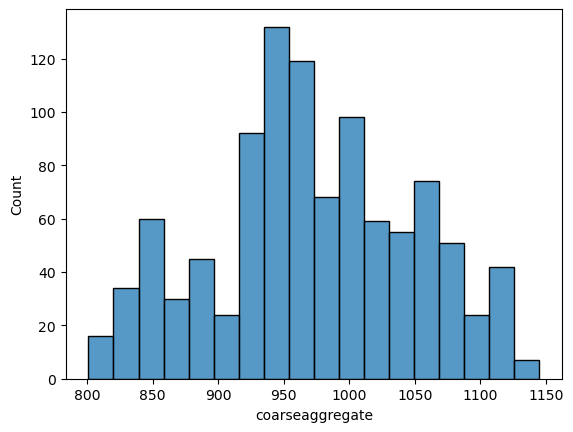

In [503]:
sns.histplot(df.coarseaggregate)
print("Coarse aggregate average: ", "{:.2f}".format(coarse_agg_avg), u"\u00B1", "{:.2f}".format(coarse_agg_std))


Fine aggregate average:  773.58 ± 80.14


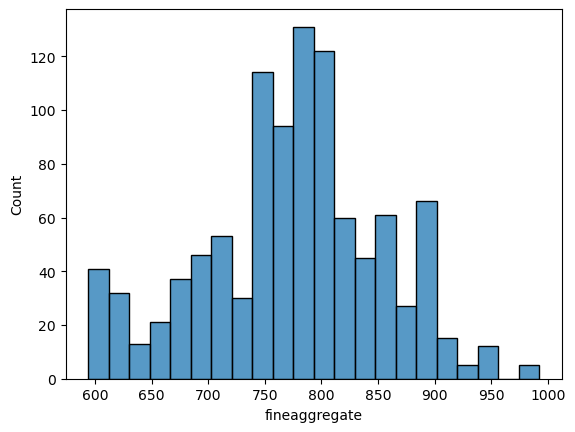

In [504]:
sns.histplot(df.fineaggregate)
print("Fine aggregate average: ", "{:.2f}".format(fine_agg_avg), u"\u00B1", "{:.2f}".format(fine_agg_std))


Age average:  45.66 ± 63.14


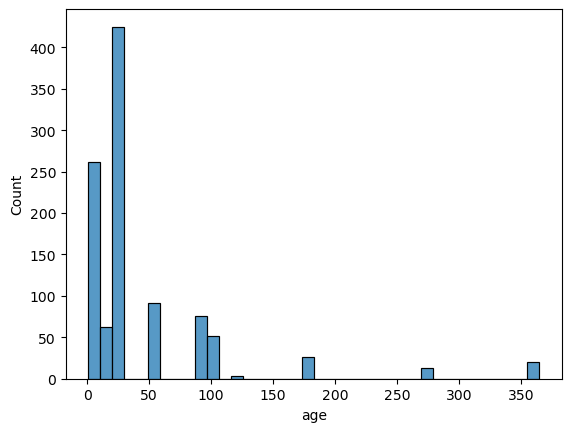

In [505]:
sns.histplot(df.age)
print("Age average: ", "{:.2f}".format(age_avg), u"\u00B1", "{:.2f}".format(age_std))


csMPa average:  35.82 ± 16.70


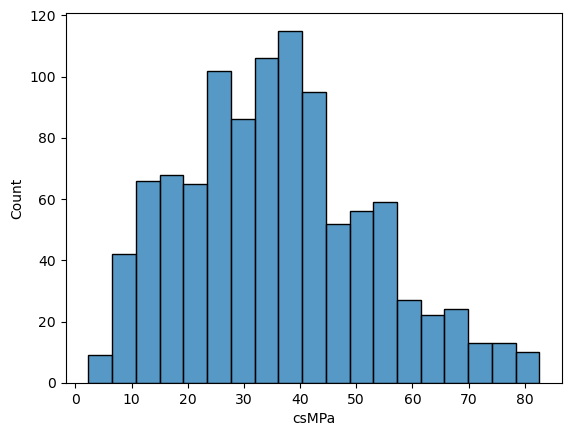

In [506]:
sns.histplot(df.csMPa)
print("csMPa average: ", "{:.2f}".format(csMPa_avg), u"\u00B1", "{:.2f}".format(csMPa_std))


# Observations


# Test/Validation Split Exercise
Goal: Produce test/validation splits using the sci-kit 

In [507]:
np.random.seed(2)

n = len(df)

In [508]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [509]:
df_indices = np.arange(n)

np.random.shuffle(df_indices)

df_shuffled = df.iloc[df_indices]

In [510]:
df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [511]:
df_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56,43.39
988,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28,16.50
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
581,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7,12.37
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90,41.68
...,...,...,...,...,...,...,...,...,...
472,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28,44.42
499,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28,55.55
659,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23
629,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.17


In [512]:
y_train = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

# Determine weights

In [513]:
def train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Select your features

In [514]:
features = ['superplasticizer', 'flyash', 'age']

In [515]:
def prepare_X(df, features):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [516]:
X_train = prepare_X(df_train, features)
w_0, w = train_linear_regression(X_train, y_train)


In [517]:
y_pred = w_0 + X_train.dot(w)

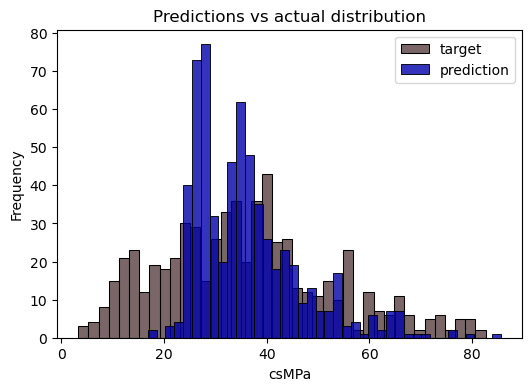

In [518]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

# Root mean squared error of prediction vs target

In [519]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [520]:
rmse(y_train, y_pred)

13.064470186812535

In [521]:
X_val = prepare_X(df_val, features)
y_pred2 = w_0 + X_val.dot(w)

In [522]:
rmse(y_val, y_pred2)

14.345310582742718

# Feature engineering

In [523]:
features = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [524]:
X_train = prepare_X(df_train, features)
w_0, w = train_linear_regression(X_train, y_train)

In [525]:
y_pred = w_0 + X_train.dot(w)

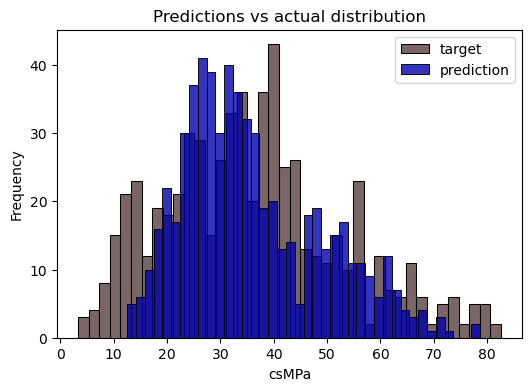

In [526]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

In [527]:
print("train RMSE: ", rmse(y_train, y_pred))

X_val = prepare_X(df_val, features)
y_pred = w_0 + X_val.dot(w)
print("validation RMSE: ", rmse(y_val, y_pred))

train RMSE:  10.460106104928043
validation RMSE:  10.282525327153756


# Linear Regression Exercise
Goal: Train linear regression model yourself
1. Select features from the dataframe
2. Train model
3. Plot histogram of prediction vs. actual

## Iterating through all combinations of indices using feature_comb_indices array: 0 - ignore feature, 1 - use feature

In [528]:
#test all combinations of features to find the best one

feature_comb_indices = [[0, 0, 0, 0, 0, 0, 0, 0], 
                        [0, 0, 0, 0, 0, 0, 0, 1],
                        [0, 0, 0, 0, 0, 0, 1, 0], 
                        [0, 0, 0, 0, 0, 0, 1, 1],
                        [0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0, 1, 0, 1],
                        [0, 0, 0, 0, 0, 1, 1, 0],
                        [0, 0, 0, 0, 0, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 1],
                        [0, 0, 0, 0, 1, 0, 1, 0],
                        [0, 0, 0, 0, 1, 0, 1, 1],
                        [0, 0, 0, 0, 1, 1, 0, 0],
                        [0, 0, 0, 0, 1, 1, 0, 1],
                        [0, 0, 0, 0, 1, 1, 1, 0],
                        [0, 0, 0, 0, 1, 1, 1, 1],
                        [0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 0, 1],
                        [0, 0, 0, 1, 0, 0, 1, 0],
                        [0, 0, 0, 1, 0, 0, 1, 1],
                        [0, 0, 0, 1, 0, 1, 0, 0],
                        [0, 0, 0, 1, 0, 1, 0, 1],
                        [0, 0, 0, 1, 0, 1, 1, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1],
                        [0, 0, 0, 1, 1, 0, 0, 0],
                        [0, 0, 0, 1, 1, 0, 0, 1],
                        [0, 0, 0, 1, 1, 0, 1, 0],
                        [0, 0, 0, 1, 1, 0, 1, 1],
                        [0, 0, 0, 1, 1, 1, 0, 0],
                        [0, 0, 0, 1, 1, 1, 0, 1],
                        [0, 0, 0, 1, 1, 1, 1, 0],
                        [0, 0, 0, 1, 1, 1, 1, 1],
                        [0, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 1],
                        [0, 0, 1, 0, 0, 0, 1, 0],
                        [0, 0, 1, 0, 0, 0, 1, 1],
                        [0, 0, 1, 0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0, 1, 0, 1],
                        [0, 0, 1, 0, 0, 1, 1, 0],
                        [0, 0, 1, 0, 0, 1, 1, 1],
                        [0, 0, 1, 0, 1, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 1],
                        [0, 0, 1, 0, 1, 0, 1, 0],
                        [0, 0, 1, 0, 1, 0, 1, 1],
                        [0, 0, 1, 0, 1, 1, 0, 0],
                        [0, 0, 1, 0, 1, 1, 0, 1],
                        [0, 0, 1, 0, 1, 1, 1, 0],
                        [0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 1, 1, 0, 0, 0, 0],
                        [0, 0, 1, 1, 0, 0, 0, 1],
                        [0, 0, 1, 1, 0, 0, 1, 0],
                        [0, 0, 1, 1, 0, 0, 1, 1],
                        [0, 0, 1, 1, 0, 1, 0, 0],
                        [0, 0, 1, 1, 0, 1, 0, 1],
                        [0, 0, 1, 1, 0, 1, 1, 0],
                        [0, 0, 1, 1, 0, 1, 1, 1],
                        [0, 0, 1, 1, 1, 0, 0, 0],
                        [0, 0, 1, 1, 1, 0, 0, 1],
                        [0, 0, 1, 1, 1, 0, 1, 0],
                        [0, 0, 1, 1, 1, 0, 1, 1],
                        [0, 0, 1, 1, 1, 1, 0, 0],
                        [0, 0, 1, 1, 1, 1, 0, 1],
                        [0, 0, 1, 1, 1, 1, 1, 0],
                        [0, 0, 1, 1, 1, 1, 1, 1],
                        [0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 1, 0, 0, 0, 0, 0, 1],
                        [0, 1, 0, 0, 0, 0, 1, 0],
                        [0, 1, 0, 0, 0, 0, 1, 1],
                        [0, 1, 0, 0, 0, 1, 0, 0],
                        [0, 1, 0, 0, 0, 1, 0, 1],
                        [0, 1, 0, 0, 0, 1, 1, 0],
                        [0, 1, 0, 0, 0, 1, 1, 1],
                        [0, 1, 0, 0, 1, 0, 0, 0],
                        [0, 1, 0, 0, 1, 0, 0, 1],
                        [0, 1, 0, 0, 1, 0, 1, 0],
                        [0, 1, 0, 0, 1, 0, 1, 1],
                        [0, 1, 0, 0, 1, 1, 0, 0],
                        [0, 1, 0, 0, 1, 1, 0, 1],
                        [0, 1, 0, 0, 1, 1, 1, 0],
                        [0, 1, 0, 0, 1, 1, 1, 1],
                        [0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 1, 0, 1, 0, 0, 0, 1],
                        [0, 1, 0, 1, 0, 0, 1, 0],
                        [0, 1, 0, 1, 0, 0, 1, 1],
                        [0, 1, 0, 1, 0, 1, 0, 0],
                        [0, 1, 0, 1, 0, 1, 0, 1],
                        [0, 1, 0, 1, 0, 1, 1, 0],
                        [0, 1, 0, 1, 0, 1, 1, 1],
                        [0, 1, 0, 1, 1, 0, 0, 0],
                        [0, 1, 0, 1, 1, 0, 0, 1],
                        [0, 1, 0, 1, 1, 0, 1, 0],
                        [0, 1, 0, 1, 1, 0, 1, 1],
                        [0, 1, 0, 1, 1, 1, 0, 0],
                        [0, 1, 0, 1, 1, 1, 0, 1],
                        [0, 1, 0, 1, 1, 1, 1, 0],
                        [0, 1, 0, 1, 1, 1, 1, 1],
                        [0, 1, 1, 0, 0, 0, 0, 0],
                        [0, 1, 1, 0, 0, 0, 0, 1],
                        [0, 1, 1, 0, 0, 0, 1, 0],
                        [0, 1, 1, 0, 0, 0, 1, 1],
                        [0, 1, 1, 0, 0, 1, 0, 0],
                        [0, 1, 1, 0, 0, 1, 0, 1],
                        [0, 1, 1, 0, 0, 1, 1, 0],
                        [0, 1, 1, 0, 0, 1, 1, 1],
                        [0, 1, 1, 0, 1, 0, 0, 0],
                        [0, 1, 1, 0, 1, 0, 0, 1],
                        [0, 1, 1, 0, 1, 0, 1, 0],
                        [0, 1, 1, 0, 1, 0, 1, 1],
                        [0, 1, 1, 0, 1, 1, 0, 0],
                        [0, 1, 1, 0, 1, 1, 0, 1],
                        [0, 1, 1, 0, 1, 1, 1, 0],
                        [0, 1, 1, 0, 1, 1, 1, 1],
                        [0, 1, 1, 1, 0, 0, 0, 0],
                        [0, 1, 1, 1, 0, 0, 0, 1],
                        [0, 1, 1, 1, 0, 0, 1, 0],
                        [0, 1, 1, 1, 0, 0, 1, 1],
                        [0, 1, 1, 1, 0, 1, 0, 0],
                        [0, 1, 1, 1, 0, 1, 0, 1],
                        [0, 1, 1, 1, 0, 1, 1, 0],
                        [0, 1, 1, 1, 0, 1, 1, 1],
                        [0, 1, 1, 1, 1, 0, 0, 0],
                        [0, 1, 1, 1, 1, 0, 0, 1],
                        [0, 1, 1, 1, 1, 0, 1, 0],
                        [0, 1, 1, 1, 1, 0, 1, 1],
                        [0, 1, 1, 1, 1, 1, 0, 0],
                        [0, 1, 1, 1, 1, 1, 0, 1],
                        [0, 1, 1, 1, 1, 1, 1, 0],
                        [0, 1, 1, 1, 1, 1, 1, 1],
                        [1, 0, 0, 0, 0, 0, 0, 0],
                        [1, 0, 0, 0, 0, 0, 0, 1],
                        [1, 0, 0, 0, 0, 0, 1, 0],
                        [1, 0, 0, 0, 0, 0, 1, 1],
                        [1, 0, 0, 0, 0, 1, 0, 0],
                        [1, 0, 0, 0, 0, 1, 0, 1],
                        [1, 0, 0, 0, 0, 1, 1, 0],
                        [1, 0, 0, 0, 0, 1, 1, 1],
                        [1, 0, 0, 0, 1, 0, 0, 0],
                        [1, 0, 0, 0, 1, 0, 0, 1],
                        [1, 0, 0, 0, 1, 0, 1, 0],
                        [1, 0, 0, 0, 1, 0, 1, 1],
                        [1, 0, 0, 0, 1, 1, 0, 0],
                        [1, 0, 0, 0, 1, 1, 0, 1],
                        [1, 0, 0, 0, 1, 1, 1, 0],
                        [1, 0, 0, 0, 1, 1, 1, 1],
                        [1, 0, 0, 1, 0, 0, 0, 0],
                        [1, 0, 0, 1, 0, 0, 0, 1],
                        [1, 0, 0, 1, 0, 0, 1, 0],
                        [1, 0, 0, 1, 0, 0, 1, 1],
                        [1, 0, 0, 1, 0, 1, 0, 0],
                        [1, 0, 0, 1, 0, 1, 0, 1],
                        [1, 0, 0, 1, 0, 1, 1, 0],
                        [1, 0, 0, 1, 0, 1, 1, 1],
                        [1, 0, 0, 1, 1, 0, 0, 0],
                        [1, 0, 0, 1, 1, 0, 0, 1],
                        [1, 0, 0, 1, 1, 0, 1, 0],
                        [1, 0, 0, 1, 1, 0, 1, 1],
                        [1, 0, 0, 1, 1, 1, 0, 0],
                        [1, 0, 0, 1, 1, 1, 0, 1],
                        [1, 0, 0, 1, 1, 1, 1, 0],
                        [1, 0, 0, 1, 1, 1, 1, 1],
                        [1, 0, 1, 0, 0, 0, 0, 0],
                        [1, 0, 1, 0, 0, 0, 0, 1],
                        [1, 0, 1, 0, 0, 0, 1, 0],
                        [1, 0, 1, 0, 0, 0, 1, 1],
                        [1, 0, 1, 0, 0, 1, 0, 0],
                        [1, 0, 1, 0, 0, 1, 0, 1],
                        [1, 0, 1, 0, 0, 1, 1, 0],
                        [1, 0, 1, 0, 0, 1, 1, 1],
                        [1, 0, 1, 0, 1, 0, 0, 0],
                        [1, 0, 1, 0, 1, 0, 0, 1],
                        [1, 0, 1, 0, 1, 0, 1, 0],
                        [1, 0, 1, 0, 1, 0, 1, 1],
                        [1, 0, 1, 0, 1, 1, 0, 0],
                        [1, 0, 1, 0, 1, 1, 0, 1],
                        [1, 0, 1, 0, 1, 1, 1, 0],
                        [1, 0, 1, 0, 1, 1, 1, 1],
                        [1, 0, 1, 1, 0, 0, 0, 0],
                        [1, 0, 1, 1, 0, 0, 0, 1],
                        [1, 0, 1, 1, 0, 0, 1, 0],
                        [1, 0, 1, 1, 0, 0, 1, 1],
                        [1, 0, 1, 1, 0, 1, 0, 0],
                        [1, 0, 1, 1, 0, 1, 0, 1],
                        [1, 0, 1, 1, 0, 1, 1, 0],
                        [1, 0, 1, 1, 0, 1, 1, 1],
                        [1, 0, 1, 1, 1, 0, 0, 0],
                        [1, 0, 1, 1, 1, 0, 0, 1],
                        [1, 0, 1, 1, 1, 0, 1, 0],
                        [1, 0, 1, 1, 1, 0, 1, 1],
                        [1, 0, 1, 1, 1, 1, 0, 0],
                        [1, 0, 1, 1, 1, 1, 0, 1],
                        [1, 0, 1, 1, 1, 1, 1, 0],
                        [1, 0, 1, 1, 1, 1, 1, 1],
                        [1, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 0, 0, 0, 0, 1],
                        [1, 1, 0, 0, 0, 0, 1, 0],
                        [1, 1, 0, 0, 0, 0, 1, 1],
                        [1, 1, 0, 0, 0, 1, 0, 0],
                        [1, 1, 0, 0, 0, 1, 0, 1],
                        [1, 1, 0, 0, 0, 1, 1, 0],
                        [1, 1, 0, 0, 0, 1, 1, 1],
                        [1, 1, 0, 0, 1, 0, 0, 0],
                        [1, 1, 0, 0, 1, 0, 0, 1],
                        [1, 1, 0, 0, 1, 0, 1, 0],
                        [1, 1, 0, 0, 1, 0, 1, 1],
                        [1, 1, 0, 0, 1, 1, 0, 0],
                        [1, 1, 0, 0, 1, 1, 0, 1],
                        [1, 1, 0, 0, 1, 1, 1, 0],
                        [1, 1, 0, 0, 1, 1, 1, 1],
                        [1, 1, 0, 1, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 1],
                        [1, 1, 0, 1, 0, 0, 1, 0],
                        [1, 1, 0, 1, 0, 0, 1, 1],
                        [1, 1, 0, 1, 0, 1, 0, 0],
                        [1, 1, 0, 1, 0, 1, 0, 1],
                        [1, 1, 0, 1, 0, 1, 1, 0],
                        [1, 1, 0, 1, 0, 1, 1, 1],
                        [1, 1, 0, 1, 1, 0, 0, 0],
                        [1, 1, 0, 1, 1, 0, 0, 1],
                        [1, 1, 0, 1, 1, 0, 1, 0],
                        [1, 1, 0, 1, 1, 0, 1, 1],
                        [1, 1, 0, 1, 1, 1, 0, 0],
                        [1, 1, 0, 1, 1, 1, 0, 1],
                        [1, 1, 0, 1, 1, 1, 1, 0],
                        [1, 1, 0, 1, 1, 1, 1, 1],
                        [1, 1, 1, 0, 0, 0, 0, 0], 
                        [1, 1, 1, 0, 0, 0, 0, 1],
                        [1, 1, 1, 0, 0, 0, 1, 0],
                        [1, 1, 1, 0, 0, 0, 1, 1],
                        [1, 1, 1, 0, 0, 1, 0, 0],
                        [1, 1, 1, 0, 0, 1, 0, 1],
                        [1, 1, 1, 0, 0, 1, 1, 0],
                        [1, 1, 1, 0, 0, 1, 1, 1],
                        [1, 1, 1, 0, 1, 0, 0, 0],
                        [1, 1, 1, 0, 1, 0, 0, 1],
                        [1, 1, 1, 0, 1, 0, 1, 0],
                        [1, 1, 1, 0, 1, 0, 1, 1],
                        [1, 1, 1, 0, 1, 1, 0, 0],
                        [1, 1, 1, 0, 1, 1, 0, 1],
                        [1, 1, 1, 0, 1, 1, 1, 0],
                        [1, 1, 1, 0, 1, 1, 1, 1],
                        [1, 1, 1, 1, 0, 0, 0, 0],
                        [1, 1, 1, 1, 0, 0, 0, 1],
                        [1, 1, 1, 1, 0, 0, 1, 0],
                        [1, 1, 1, 1, 0, 0, 1, 1],
                        [1, 1, 1, 1, 0, 1, 0, 0],
                        [1, 1, 1, 1, 0, 1, 0, 1],
                        [1, 1, 1, 1, 0, 1, 1, 0],
                        [1, 1, 1, 1, 0, 1, 1, 1],
                        [1, 1, 1, 1, 1, 0, 0, 0],
                        [1, 1, 1, 1, 1, 0, 0, 1],
                        [1, 1, 1, 1, 1, 0, 1, 0],
                        [1, 1, 1, 1, 1, 0, 1, 1],
                        [1, 1, 1, 1, 1, 1, 0, 0],
                        [1, 1, 1, 1, 1, 1, 0, 1],
                        [1, 1, 1, 1, 1, 1, 1, 0],
                        [1, 1, 1, 1, 1, 1, 1, 1]]

In [529]:
feature_comb_indices[0]

[0, 0, 0, 0, 0, 0, 0, 0]

In [530]:
features = ['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [531]:
features[0]

'cement'

In [532]:
#make functions to: 
    #get features from indices - get_features
    #train model calling prepare X, calc RMSE, find lowest RMSE - train_model() 

In [533]:
def get_features(feature_set):
    
    curr_features = []
    for i in range(len(feature_set)):
        if feature_set[i] == 1:
            curr_features.append(features[i])
    
    return curr_features

get_features(feature_comb_indices[15])

['age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [534]:
df_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56
988,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28
581,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90
...,...,...,...,...,...,...,...,...
472,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28
499,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28
659,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90
629,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7


In [535]:

def train_model(df_train, df_val):
    
    for i in range(256):
        
        print("Feature #", i, ": ", feature_comb_indices[i], "\t RMSE: ", end = " ")

        train_feats = get_features(feature_comb_indices[i])
    
        X_train = prepare_X(df_train, train_feats)
        w_0, w = train_linear_regression(X_train, y_train)
        y_pred = w_0 + X_train.dot(w)
        
        print("train RMSE: ", round(rmse(y_train, y_pred),3), end = " ")


        X_val = prepare_X(df_val, train_feats )
        y_pred = w_0 + X_val.dot(w)
        print("validation RMSE: ", round(rmse(y_val, y_pred),3))
            
        

In [536]:
train_model(df_train, df_val)

Feature # 0 :  [0, 0, 0, 0, 0, 0, 0, 0] 	 RMSE:  train RMSE:  16.796 validation RMSE:  17.543
Feature # 1 :  [0, 0, 0, 0, 0, 0, 0, 1] 	 RMSE:  train RMSE:  16.676 validation RMSE:  17.118
Feature # 2 :  [0, 0, 0, 0, 0, 0, 1, 0] 	 RMSE:  train RMSE:  16.481 validation RMSE:  17.711
Feature # 3 :  [0, 0, 0, 0, 0, 0, 1, 1] 	 RMSE:  train RMSE:  16.291 validation RMSE:  17.127
Feature # 4 :  [0, 0, 0, 0, 0, 1, 0, 0] 	 RMSE:  train RMSE:  15.36 validation RMSE:  16.835
Feature # 5 :  [0, 0, 0, 0, 0, 1, 0, 1] 	 RMSE:  train RMSE:  14.999 validation RMSE:  15.887
Feature # 6 :  [0, 0, 0, 0, 0, 1, 1, 0] 	 RMSE:  train RMSE:  15.29 validation RMSE:  16.946
Feature # 7 :  [0, 0, 0, 0, 0, 1, 1, 1] 	 RMSE:  train RMSE:  14.891 validation RMSE:  15.93
Feature # 8 :  [0, 0, 0, 0, 1, 0, 0, 0] 	 RMSE:  train RMSE:  15.762 validation RMSE:  16.366
Feature # 9 :  [0, 0, 0, 0, 1, 0, 0, 1] 	 RMSE:  train RMSE:  15.694 validation RMSE:  16.128
Feature # 10 :  [0, 0, 0, 0, 1, 0, 1, 0] 	 RMSE:  train RMSE:  

Feature # 149 :  [1, 0, 0, 1, 0, 1, 0, 1] 	 RMSE:  train RMSE:  13.356 validation RMSE:  12.984
Feature # 150 :  [1, 0, 0, 1, 0, 1, 1, 0] 	 RMSE:  train RMSE:  13.498 validation RMSE:  13.677
Feature # 151 :  [1, 0, 0, 1, 0, 1, 1, 1] 	 RMSE:  train RMSE:  13.065 validation RMSE:  12.699
Feature # 152 :  [1, 0, 0, 1, 1, 0, 0, 0] 	 RMSE:  train RMSE:  12.412 validation RMSE:  12.292
Feature # 153 :  [1, 0, 0, 1, 1, 0, 0, 1] 	 RMSE:  train RMSE:  12.019 validation RMSE:  11.632
Feature # 154 :  [1, 0, 0, 1, 1, 0, 1, 0] 	 RMSE:  train RMSE:  11.927 validation RMSE:  12.193
Feature # 155 :  [1, 0, 0, 1, 1, 0, 1, 1] 	 RMSE:  train RMSE:  11.085 validation RMSE:  10.911
Feature # 156 :  [1, 0, 0, 1, 1, 1, 0, 0] 	 RMSE:  train RMSE:  11.803 validation RMSE:  11.971
Feature # 157 :  [1, 0, 0, 1, 1, 1, 0, 1] 	 RMSE:  train RMSE:  11.517 validation RMSE:  11.351
Feature # 158 :  [1, 0, 0, 1, 1, 1, 1, 0] 	 RMSE:  train RMSE:  11.678 validation RMSE:  12.008
Feature # 159 :  [1, 0, 0, 1, 1, 1, 1, 1

Lowest train RMSE achieved with all 8 features: 10.46 %

Lowest validation RMSE achieved with first 5 features: 10.248 %

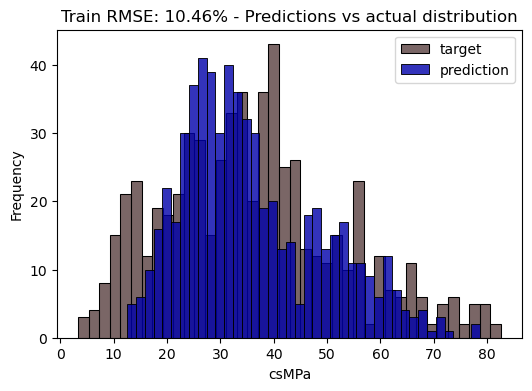

In [537]:
#Lowest train RMSE 

train_feats = get_features([1,1,1,1,1,1,1,1])

X_train = prepare_X(df_train, train_feats)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Train RMSE: 10.46% - Predictions vs actual distribution')

plt.show()

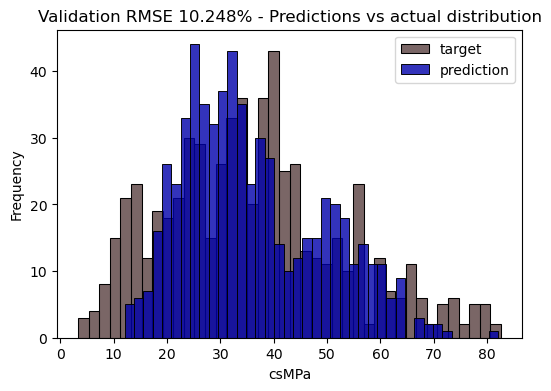

In [538]:
#Lowest validation RMSE 

train_feats = get_features([1,1,1,1,1,0,0,0])

X_train = prepare_X(df_train, train_feats)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Validation RMSE 10.248% - Predictions vs actual distribution')

plt.show()

# Additional features exercise
Goal: Create additional features as mathematical functions of existing ones

1. Create features (rations, squares, ... )
2. Include in your data frame
3. Perform linear regression on the entire set of descriptors
4. Compute RMSE



In [642]:
#here, i will compare the accuracy of the original features to features scaled to range
df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


y_train = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values


df_train['norm_cement'] = (df_train['cement'] - df_train['cement'].min()) / (df_train['cement'].max() - df_train['cement'].min())
df_train['norm_slag'] = (df_train['slag'] - df_train['slag'].min()) / (df_train['slag'].max() - df_train['slag'].min())
df_train['norm_flyash'] = (df_train['flyash'] - df_train['flyash'].min()) / (df_train['flyash'].max() - df_train['flyash'].min())
df_train['norm_water'] = (df_train['water'] - df_train['water'].min()) / (df_train['water'].max() - df_train['water'].min())
df_train['norm_superplasticizer'] = (df_train['superplasticizer'] - df_train['superplasticizer'].min()) / (df_train['superplasticizer'].max() - df_train['superplasticizer'].min())
df_train['norm_coarseaggregate'] = (df_train['coarseaggregate'] - df_train['coarseaggregate'].min()) / (df_train['coarseaggregate'].max() - df_train['coarseaggregate'].min())
df_train['norm_fineaggregate'] = (df_train['fineaggregate'] - df_train['fineaggregate'].min()) / (df_train['fineaggregate'].max() - df_train['fineaggregate'].min())
df_train['norm_age'] = (df_train['age'] - df_train['age'].min()) / (df_train['age'].max() - df_train['age'].min())
df_train['agg_ratio'] = df_train['coarseaggregate'] / df_train['fineaggregate']
df_train['water_cement_ratio'] = df_train['water'] / df_train['cement']
df_train['sqrt_cement'] = np.sqrt(df_train['norm_cement']) 
df_train['sqrt_slag'] = np.sqrt(df_train['norm_slag'])
df_train['sqrt_flyash'] = np.sqrt(df_train['norm_flyash'])
df_train['sqrt_water']= np.sqrt(df_train['norm_water'])
df_train['sqrt_superplasticizer'] = np.sqrt(df_train['norm_superplasticizer'])
df_train['sqrt_coarseaggregate'] = np.sqrt(df_train['norm_coarseaggregate'])
df_train['sqrt_fineaggregate'] = np.sqrt(df_train['norm_fineaggregate'])
df_train['sqrt_age'] = np.sqrt(df_train['norm_age'])


df_val['norm_cement'] = (df_val['cement'] - df_val['cement'].min()) / (df_val['cement'].max() - df_val['cement'].min())
df_val['norm_slag'] = (df_val['slag'] - df_val['slag'].min()) / (df_val['slag'].max() - df_val['slag'].min())
df_val['norm_flyash'] = (df_val['flyash'] - df_val['flyash'].min()) / (df_val['flyash'].max() - df_val['flyash'].min())
df_val['norm_water'] = (df_val['water'] - df_val['water'].min()) / (df_val['water'].max() - df_val['water'].min())
df_val['norm_superplasticizer'] = (df_val['superplasticizer'] - df_val['superplasticizer'].min()) / (df_val['superplasticizer'].max() - df_val['superplasticizer'].min())
df_val['norm_coarseaggregate'] = (df_val['coarseaggregate'] - df_val['coarseaggregate'].min()) / (df_val['coarseaggregate'].max() - df_val['coarseaggregate'].min())
df_val['norm_fineaggregate'] = (df_val['fineaggregate'] - df_val['fineaggregate'].min()) / (df_val['fineaggregate'].max() - df_val['fineaggregate'].min())
df_val['norm_age'] = (df_val['age'] - df_val['age'].min()) / (df_val['age'].max() - df_val['age'].min())
df_val['agg_ratio'] = df_val['coarseaggregate'] / df_val['fineaggregate']
df_val['water_cement_ratio'] = df_val['water'] / df_val['cement']
df_val['sqrt_cement'] = np.sqrt(df_val['norm_cement']) 
df_val['sqrt_slag'] = np.sqrt(df_val['norm_slag'])
df_val['sqrt_flyash'] = np.sqrt(df_val['norm_flyash'])
df_val['sqrt_water']= np.sqrt(df_val['norm_water'])
df_val['sqrt_superplasticizer'] = np.sqrt(df_val['norm_superplasticizer'])
df_val['sqrt_coarseaggregate'] = np.sqrt(df_val['norm_coarseaggregate'])
df_val['sqrt_fineaggregate'] = np.sqrt(df_val['norm_fineaggregate'])
df_val['sqrt_age'] = np.sqrt(df_val['norm_age'])

df_test['norm_cement'] = (df_test['cement'] - df_test['cement'].min()) / (df_test['cement'].max() - df_test['cement'].min())
df_test['norm_slag'] = (df_test['slag'] - df_test['slag'].min()) / (df_test['slag'].max() - df_val['slag'].min())
df_test['norm_flyash'] = (df_test['flyash'] - df_test['flyash'].min()) / (df_test['flyash'].max() - df_test['flyash'].min())
df_test['norm_water'] = (df_test['water'] - df_test['water'].min()) / (df_test['water'].max() - df_test['water'].min())
df_test['norm_superplasticizer'] = (df_test['superplasticizer'] - df_test['superplasticizer'].min()) / (df_test['superplasticizer'].max() - df_test['superplasticizer'].min())
df_test['norm_coarseaggregate'] = (df_test['coarseaggregate'] - df_test['coarseaggregate'].min()) / (df_test['coarseaggregate'].max() - df_test['coarseaggregate'].min())
df_test['norm_fineaggregate'] = (df_test['fineaggregate'] - df_test['fineaggregate'].min()) / (df_test['fineaggregate'].max() - df_test['fineaggregate'].min())
df_test['norm_age'] = (df_test['age'] - df_test['age'].min()) / (df_test['age'].max() - df_test['age'].min())
df_test['agg_ratio'] = df_test['coarseaggregate'] / df_test['fineaggregate']
df_test['water_cement_ratio'] = df_test['water'] / df_test['cement']
df_test['sqrt_cement'] = np.sqrt(df_test['norm_cement']) 
df_test['sqrt_slag'] = np.sqrt(df_test['norm_slag'])
df_test['sqrt_flyash'] = np.sqrt(df_test['norm_flyash'])
df_test['sqrt_water']= np.sqrt(df_test['norm_water'])
df_test['sqrt_superplasticizer'] = np.sqrt(df_test['norm_superplasticizer'])
df_test['sqrt_coarseaggregate'] = np.sqrt(df_test['norm_coarseaggregate'])
df_test['sqrt_fineaggregate'] = np.sqrt(df_test['norm_fineaggregate'])
df_test['sqrt_age'] = np.sqrt(df_test['norm_age'])

In [595]:
df_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,norm_cement,...,agg_ratio,water_cement_ratio,sqrt_cement,sqrt_slag,sqrt_flyash,sqrt_water,sqrt_superplasticizer,sqrt_coarseaggregate,sqrt_fineaggregate,sqrt_age
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56,43.39,0.211644,...,1.106676,0.874165,0.460048,0.000000,0.708872,0.648181,0.482617,0.768804,0.878751,0.388714
988,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28,16.50,0.117808,...,1.403253,1.432943,0.343232,0.633423,0.749333,0.923742,0.560058,0.605505,0.400389,0.272352
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69,0.342466,...,1.417092,0.734127,0.585206,0.000000,0.000000,0.740683,0.000000,0.964413,0.690412,0.272352
581,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7,12.37,0.182420,...,1.417332,1.020891,0.427107,0.871231,0.000000,0.744773,0.000000,0.796407,0.549369,0.128388
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90,41.68,0.527397,...,1.105151,0.576577,0.726221,0.000000,0.000000,0.780625,0.000000,0.625011,0.789736,0.494475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28,44.42,0.785388,...,1.358146,0.363229,0.886221,0.258414,0.628490,0.590727,0.600207,0.705726,0.544092,0.272352
499,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28,55.55,0.888128,...,1.261803,0.427699,0.942405,0.268966,0.784219,0.875000,0.348020,0.492975,0.513247,0.272352
659,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23,0.014384,...,1.105065,1.879040,0.119931,0.672208,0.000000,0.842141,0.000000,0.641593,0.799837,0.494475
629,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.17,0.280822,...,1.336134,0.804444,0.529926,0.000000,0.000000,0.716860,0.000000,0.967519,0.774338,0.128388


In [562]:
#adding normalized features to dataframe

train_feats = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', \
               'norm_cement', 'norm_slag','norm_flyash','norm_water', 'norm_superplasticizer', 'norm_coarseaggregate', \
                'norm_fineaggregate','norm_age']
 
    
train_feats = ['cement', 'norm_cement','slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

train_feats = ['norm_cement', 'norm_slag','norm_flyash','norm_water', 'norm_superplasticizer', 'norm_coarseaggregate', \
                'norm_fineaggregate','norm_age', 'agg_ratio', 'water_cement_ratio']

X_train = prepare_X(df_train, train_feats)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
        
print("train RMSE: ", round(rmse(y_train, y_pred),3), end = " ")


X_val = prepare_X(df_val, train_feats)
y_pred_val = w_0 + X_val.dot(w)
print("validation RMSE: ", round(rmse(y_val, y_pred_val),3))        

train RMSE:  10.302 validation RMSE:  10.883


Slight improvement to RMSE when including ratio of coarse aggregate to fine aggregate and water to cement and (using normalized features)

# Use LASSO on your descriptors
Goal: Select your most promising features
1. Create/select features from previous exercise
2. Include in your data frame
3. Perform linear regression on the entire set of descriptors
4. Perform LASSO method and plot resulting weights
5. Compare to the weights you get with regular regression



In [563]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [612]:

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(math.sqrt(-1.0*lasso_regressor.best_score_))



{'alpha': 0.01}
6.61461528318082


/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.788e+03, tolerance: 1.470e+01
  model = cd_fast.enet_coordinate_descent(
/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.670e+03, tolerance: 1.378e+01
  model = cd_fast.enet_coordinate_descent(
/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

In [618]:
prediction_lasso = lasso_regressor.predict(X_train)

In [614]:
print(lasso_regressor.best_estimator_.coef_)

[ 5.17706962e+01  0.00000000e+00  0.00000000e+00 -1.05760140e+01
 -2.12104782e+01  2.80443327e+00 -0.00000000e+00 -7.92427800e+01
 -0.00000000e+00 -1.40639872e+00  6.27825681e-02 -0.00000000e+00
 -3.16445221e+00 -8.91856290e+00  0.00000000e+00  4.02911240e+01
  0.00000000e+00  0.00000000e+00  2.11281048e+01  5.90112100e+00
  1.20464926e+01  1.18094831e+02]


In [615]:
w
            

array([ 45.91970972,  37.68444769,  15.78021285, -11.65874477,
        13.26444464,  33.00613859, -30.62187827,  44.58293692,
       -62.07446594,  -5.83517352])

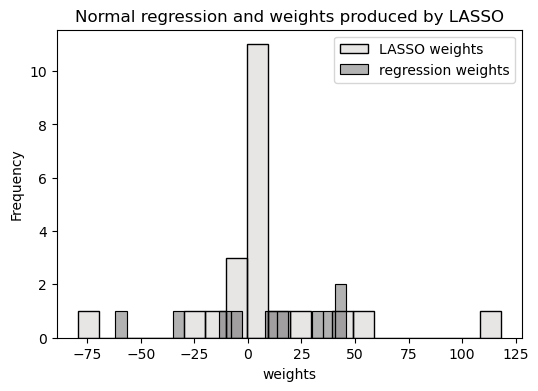

In [619]:
plt.figure(figsize=(6, 4))

sns.histplot(lasso_regressor.best_estimator_.coef_, label='LASSO weights', color='#220000', alpha=0.1, bins=20)
sns.histplot(w, label='regression weights', color='#000001', alpha=0.3, bins= 20)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('weights')
plt.title('Normal regression and weights produced by LASSO')

plt.show()

For all features, weights produced by regular regression and LASSO are the same (small decimal differences)

# Lowest RMSE competition
Goal: Achieve the lowest RMSE among your classmates

1. Use all of the strategies learned thus far to try and find the lowest RMSE for the concrete data set

The best score found with LASSO was 10.65698% 

# Apply and evaluate model to test set
Goal: Run predictions for your test set and evaluate model accuracy

1. Switch feature matrix to test set
2. Predict
3. Compute percentage of agreement



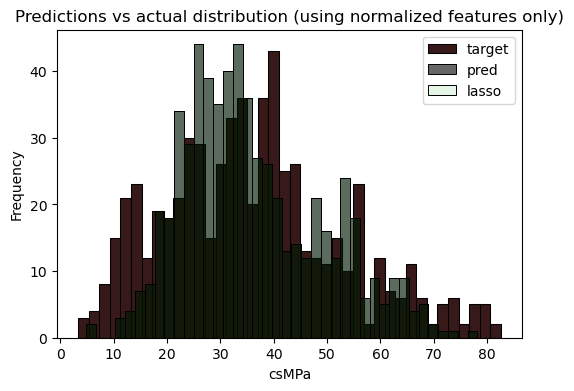

In [569]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.9, bins=40)
sns.histplot(y_pred, label='pred', color='#000001', alpha=0.6, bins=40)
sns.histplot(prediction_lasso, label='lasso', color='#00a011', alpha=0.1, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution (using normalized features only)')

plt.show()

Pred and lasso overlap

# Improve model accuracy
Goal: Try to improve test set agreement percentage
1. Create/set/exclude features
2. Train & perform logistic linear regression
3. Compute percentage of agreement and find the best one you can

In [596]:
df_train['goodconcrete']=(df_train.csMPa>45.0).astype(int)
df_train['young'] = (df_train.age<50).astype(int)
df_train['watery'] = (df_train.water_cement_ratio>1).astype(int)
df_train['has_slag'] = (df_train.slag>0).astype(int)
df_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,norm_cement,...,sqrt_flyash,sqrt_water,sqrt_superplasticizer,sqrt_coarseaggregate,sqrt_fineaggregate,sqrt_age,goodconcrete,young,watery,has_slag
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56,43.39,0.211644,...,0.708872,0.648181,0.482617,0.768804,0.878751,0.388714,0,0,0,0
988,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28,16.50,0.117808,...,0.749333,0.923742,0.560058,0.605505,0.400389,0.272352,0,1,1,1
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69,0.342466,...,0.000000,0.740683,0.000000,0.964413,0.690412,0.272352,0,1,0,0
581,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7,12.37,0.182420,...,0.000000,0.744773,0.000000,0.796407,0.549369,0.128388,0,1,1,1
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90,41.68,0.527397,...,0.000000,0.780625,0.000000,0.625011,0.789736,0.494475,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28,44.42,0.785388,...,0.628490,0.590727,0.600207,0.705726,0.544092,0.272352,0,1,0,1
499,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28,55.55,0.888128,...,0.784219,0.875000,0.348020,0.492975,0.513247,0.272352,1,1,0,1
659,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23,0.014384,...,0.000000,0.842141,0.000000,0.641593,0.799837,0.494475,0,0,1,1
629,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.17,0.280822,...,0.000000,0.716860,0.000000,0.967519,0.774338,0.128388,0,1,0,0


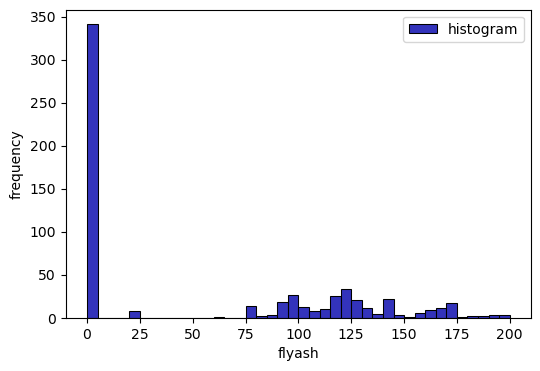

In [571]:
plt.figure(figsize=(6, 4))

sns.histplot(df_train.flyash, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('flyash')

plt.show()

In [572]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [573]:
df_train_full, df_test = train_test_split(df_train, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values

del df_train['goodconcrete']
del df_val['goodconcrete']

del df_train['csMPa']
del df_val['csMPa']

In [574]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.goodconcrete)


In [575]:
numerical=['norm_cement', 'norm_slag','norm_flyash','norm_water', 'norm_superplasticizer', 'norm_coarseaggregate', \
                'norm_fineaggregate','norm_age', 'agg_ratio', 'water_cement_ratio', 'flyash', 'young', 'watery',\
          'has_slag', 'sqrt_cement', 'sqrt_slag','sqrt_flyash','sqrt_water', \
           'sqrt_superplasticizer','sqrt_coarseaggregate','sqrt_fineaggregate','sqrt_age']

df_train_full[numerical].corrwith(df_train_full.goodconcrete).to_frame('correlation')

,correlation
norm_cement,0.396084
norm_slag,0.125174
norm_flyash,-0.111835
norm_water,-0.312209
norm_superplasticizer,0.360109
norm_coarseaggregate,-0.093980
norm_fineaggregate,-0.077758
norm_age,0.245352
agg_ratio,0.023096
water_cement_ratio,-0.417345


In [576]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'cement': 425.0,
 'slag': 106.3,
 'flyash': 0.0,
 'water': 153.5,
 'superplasticizer': 16.5,
 'coarseaggregate': 852.1,
 'fineaggregate': 887.1,
 'age': 91,
 'norm_cement': 0.7374429223744292,
 'norm_slag': 0.29577072899276574,
 'norm_flyash': 0.0,
 'norm_water': 0.2751736111111111,
 'norm_superplasticizer': 0.5124223602484471,
 'norm_coarseaggregate': 0.1533153315331534,
 'norm_fineaggregate': 0.7353236327145007,
 'norm_age': 0.24725274725274726,
 'agg_ratio': 0.9605455980160073,
 'water_cement_ratio': 0.3611764705882353,
 'sqrt_cement': 0.8587449693444668,
 'sqrt_slag': 0.5438480752864404,
 'sqrt_flyash': 0.0,
 'sqrt_water': 0.5245699296672571,
 'sqrt_superplasticizer': 0.7158368251553192,
 'sqrt_coarseaggregate': 0.3915550172493687,
 'sqrt_fineaggregate': 0.857510135633685,
 'sqrt_age': 0.4972451580988469,
 'young': 0,
 'watery': 0,
 'has_slag': 1}

In [577]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [578]:
X_train = dv.transform(train_dict)
X_train.shape

(330, 29)

In [579]:
dv.get_feature_names()

/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'agg_ratio',
 'cement',
 'coarseaggregate',
 'fineaggregate',
 'flyash',
 'has_slag',
 'norm_age',
 'norm_cement',
 'norm_coarseaggregate',
 'norm_fineaggregate',
 'norm_flyash',
 'norm_slag',
 'norm_superplasticizer',
 'norm_water',
 'slag',
 'sqrt_age',
 'sqrt_cement',
 'sqrt_coarseaggregate',
 'sqrt_fineaggregate',
 'sqrt_flyash',
 'sqrt_slag',
 'sqrt_superplasticizer',
 'sqrt_water',
 'superplasticizer',
 'water',
 'water_cement_ratio',
 'watery',
 'young']

In [580]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

model.predict(X_val)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [581]:
model.predict_proba(X_val)

array([[3.30193022e-01, 6.69806978e-01],
       [3.53225308e-02, 9.64677469e-01],
       [9.79586140e-01, 2.04138604e-02],
       [9.88924888e-01, 1.10751122e-02],
       [9.94438037e-01, 5.56196327e-03],
       [2.54625716e-01, 7.45374284e-01],
       [9.17109518e-01, 8.28904824e-02],
       [9.72754650e-01, 2.72453498e-02],
       [9.74565412e-01, 2.54345877e-02],
       [9.85757760e-01, 1.42422402e-02],
       [7.43736536e-01, 2.56263464e-01],
       [9.25736999e-01, 7.42630010e-02],
       [9.53239185e-01, 4.67608148e-02],
       [9.90871996e-01, 9.12800420e-03],
       [9.26750962e-01, 7.32490382e-02],
       [9.55412889e-01, 4.45871111e-02],
       [9.36449800e-01, 6.35502003e-02],
       [3.42755338e-01, 6.57244662e-01],
       [8.48828800e-01, 1.51171200e-01],
       [2.29859494e-02, 9.77014051e-01],
       [9.50730203e-01, 4.92697970e-02],
       [8.93244860e-01, 1.06755140e-01],
       [3.12287688e-01, 6.87712312e-01],
       [9.92478035e-01, 7.52196542e-03],
       [9.945059

# Use RR on your descriptors 
Goal: Compare ridge-regression result to your previous models
1. Create/select features similar to before
2. Perform ridge-regression using scikit-learn
3. Compare to the weights you get in regular regression

In [604]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


In [605]:
X_train = prepare_X(df_train, numerical)


In [606]:
alphas = 10 ** np.linspace(10,-2,100) * 0.5

In [607]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reprod

(100, 22)

Text(0, 0.5, 'weights')

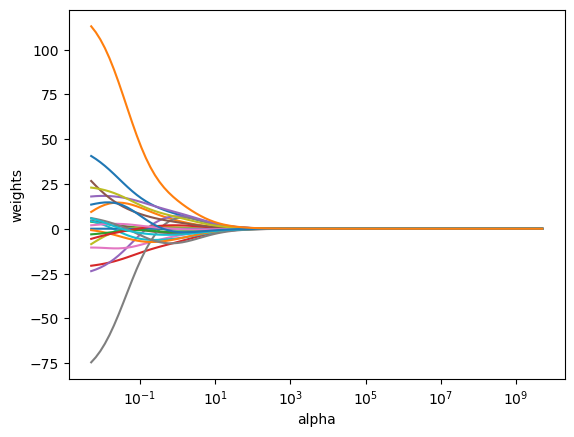

In [608]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [620]:
print(mean_squared_error(y_train, ridge.predict(X_train)))

40.310353898829966


In [643]:
y_train = df_train.csMPa.values
y_train

X_train

array([[0.21164384, 0.        , 0.5025    , ..., 0.76880368, 0.87875065,
        0.38871442],
       [0.11780822, 0.40122426, 0.5615    , ..., 0.6055053 , 0.40038867,
        0.27235239],
       [0.34246575, 0.        , 0.        , ..., 0.9644133 , 0.69041172,
        0.27235239],
       ...,
       [0.01438356, 0.45186422, 0.        , ..., 0.64159268, 0.79983691,
        0.49447497],
       [0.28082192, 0.        , 0.        , ..., 0.96751931, 0.77433752,
        0.12838815],
       [0.39954338, 0.        , 0.        , ..., 0.70784893, 0.81074074,
        0.99310812]])

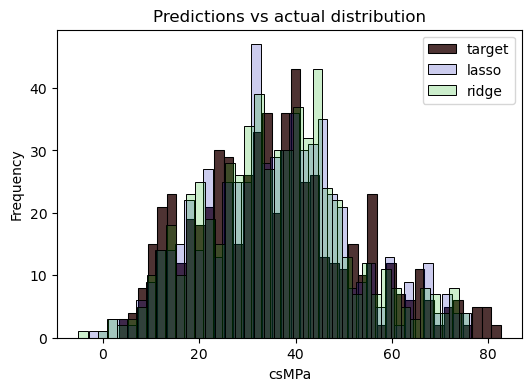

In [622]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#220000', alpha=0.8, bins=40)
sns.histplot(prediction_lasso, label='lasso', color='#0000aa', alpha=0.2, bins=40)
sns.histplot(ridge.predict(X_train), label='ridge', color='#00aa00', alpha=0.2, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

# Use KRR on your descriptors
Goal: Compare kernel ridge regression result to previous models
1. Create/select features similar to before
2. Perform ridge-regression using scikit-learn
3. Test if your model is overfit or not

In [623]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge



In [624]:
kr = GridSearchCV(KernelRidge(kernel="rbf"),
                              param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},)

In [654]:
features=['norm_cement', 'norm_slag','norm_flyash','norm_water', 'norm_superplasticizer', 'norm_coarseaggregate', \
                'norm_fineaggregate','norm_age', 'agg_ratio', 'water_cement_ratio', 'flyash',  'sqrt_cement', 'sqrt_slag','sqrt_flyash','sqrt_water', \
           'sqrt_superplasticizer','sqrt_coarseaggregate','sqrt_fineaggregate','sqrt_age']
X_train = prepare_X(df_train, features)
X_test = prepare_X(df_test, features)
X_val = prepare_X(df_val, features)

# Compare timings 
Goal: Compare training times for the different models
1. Evaluate the time it takes to perform hyper parameter optimization for LASSO, RR, KRR
2. Determine this for three different training sizes
3. Plot the results

In [655]:
import time

In [662]:
t0 = time.time()
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
t_lasso = time.time() - t0
print("LASSO regression trained in: %.3f s" % t_lasso)


LASSO regression trained in: 0.011 s


In [665]:
t0 = time.time()
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
   
t_rr = time.time() - t0
print("RR trained in: %.3f s" % t_rr)

RR trained in: 0.104 s


/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reprod

In [656]:
t0 = time.time()
kr.fit(X_train, y_train)
kr_fit = time.time() - t0
print("Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)
print(kr.best_params_)

Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}
KRR complexity and bandwidth selected and model fitted in 0.675 s
{'alpha': 0.001, 'gamma': 0.1}


In [657]:
print(mean_squared_error(y_train, kr.predict(X_train)))

9.399415337687456


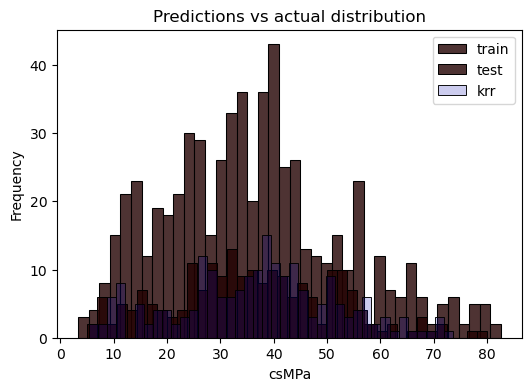

In [659]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='train', color='#220000', alpha=0.8, bins=40)
sns.histplot(y_test, label='test', color='#220000', alpha=0.8, bins=40)
sns.histplot(kr.predict(X_test), label='krr', color='#0000aa', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('csMPa')
plt.title('Predictions vs actual distribution')

plt.show()

# Use KNN on your descriptors
Goal: Compare KNN to your previous models
1. Create/select features similar to before
2. Perform KNN on these using scikit-learn
3. Use cross-validation to determine k and avoid overfit/underfit
4. Plot predictions together with other models

In [668]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# here we set the style of the plots that will be shown below
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (8,6)
title_size=24

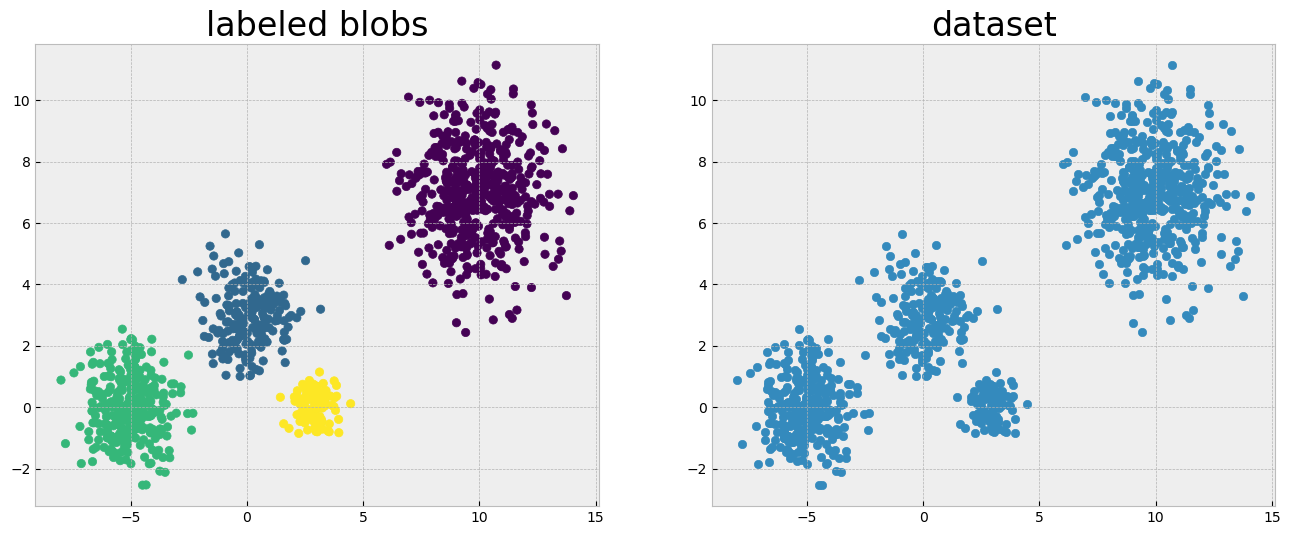

In [669]:
# We set a random_state to generate always the same Gaussian sampling.
random_state = 0
# The make_blobs function requires the centers, standard deviations and number of samples for each Gaussian to sample.
centers = [[10,7],[0,3],[-5,0],[3,0]]
n_samples = [500,200,300,100]
cluster_std=[1.5,1,1,0.5]
     
X_blobs, y_blobs = make_blobs(n_samples=n_samples,
                   random_state=random_state,
                   cluster_std=cluster_std,
                   centers=centers)

fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_blobs[:,0],X_blobs[:,1],c=y_blobs)
axs[0].set_title('labeled blobs', size=title_size)
axs[1].scatter(X_blobs[:,0],X_blobs[:,1])
axs[1].set_title('dataset', size=title_size)

plt.show();

4  clusters were extracted.


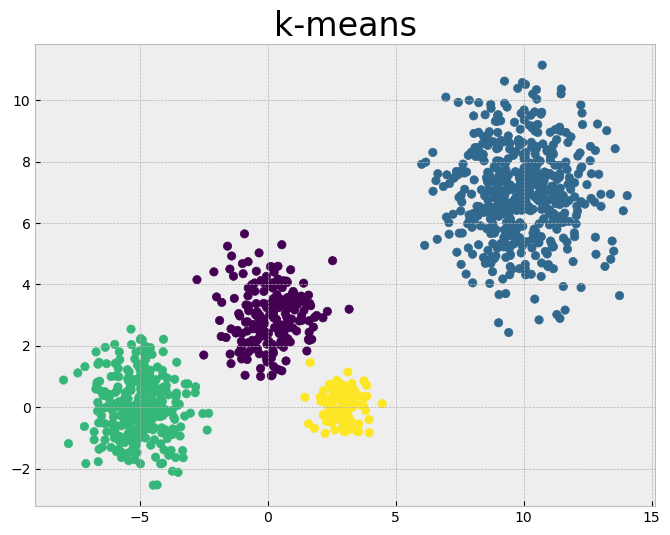

In [671]:
n_clusters = 4
# 'fit_predict' runs the clustering algorithm and returns the labels assigned to each datapoint.
# Different label values indicate different clusters.
labels = KMeans(n_clusters=n_clusters).fit_predict(X_blobs)
print(np.max(labels)+1,' clusters were extracted.') 

plt.title('k-means', size=title_size)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=labels);

6  clusters were extracted.


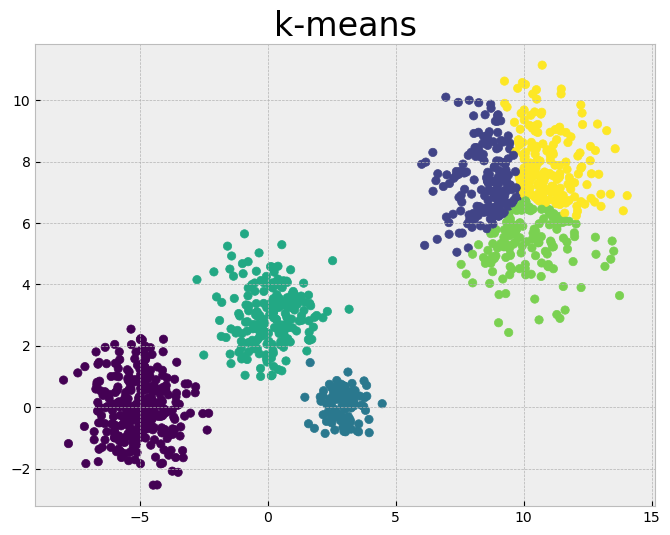

In [672]:
n_clusters = 6
labels = KMeans(n_clusters=n_clusters).fit_predict(X_blobs)
print(np.max(labels)+1,' clusters were extracted.') 
plt.title('k-means', size=title_size)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=labels);

3  clusters were extracted.


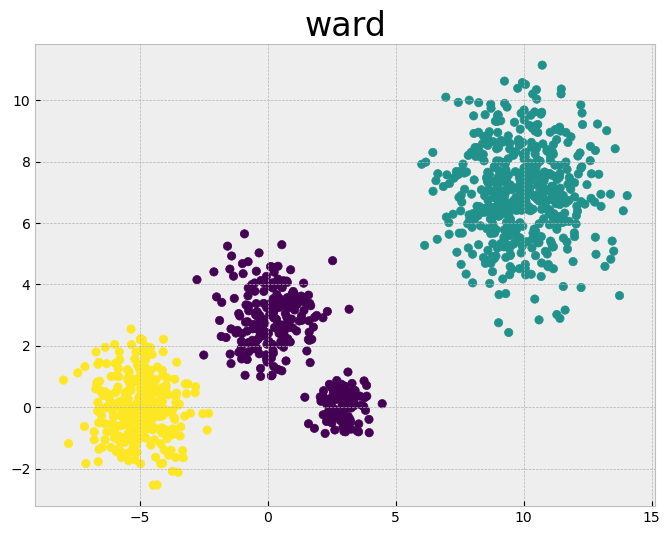

In [673]:
distance_threshold=100
# We use the SciPy implementation of hierarchical clustering and select the 'ward' the linkage criterion.
Z = linkage(X_blobs, 'ward' )
# 'cut_tree' returns the cluster assignments obtained if the algorithm stops merging clusters
# when they are at a further distance than a 'distance_threshold' value. 
labels = cut_tree(Z, height=distance_threshold)
print(np.max(labels)+1,' clusters were extracted.') 
plt.title('ward', size=title_size)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=labels.T[0]);

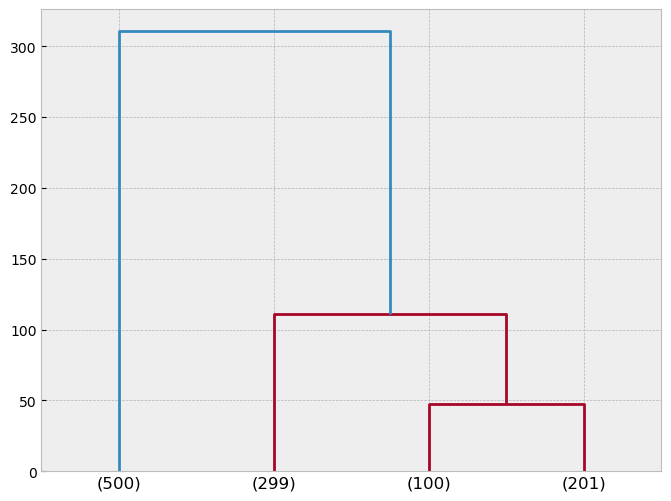

In [674]:
# SciPy implements a function for directly plotting the dendrogram.
dendrogram(Z, truncate_mode='lastp',p=4);

4  clusters were extracted.


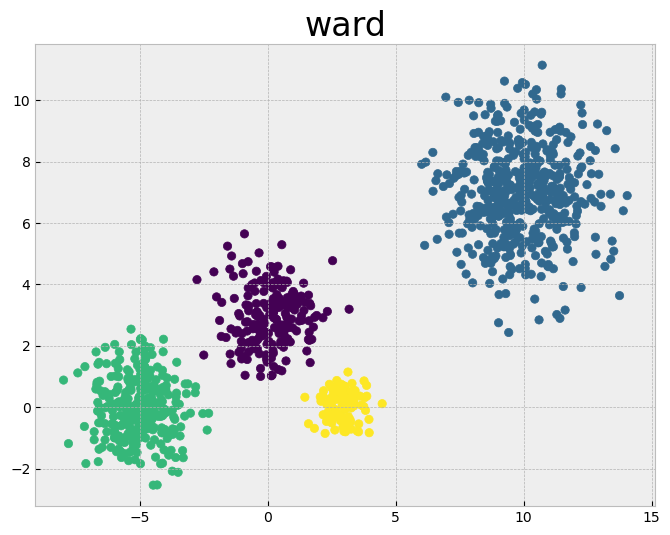

In [675]:
distance_threshold = 40
Z = linkage(X_blobs, 'ward' )
labels = cut_tree(Z, height=distance_threshold)
print(np.max(labels)+1,' clusters were extracted.') 

plt.title('ward', size=title_size)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=labels.T[0]);

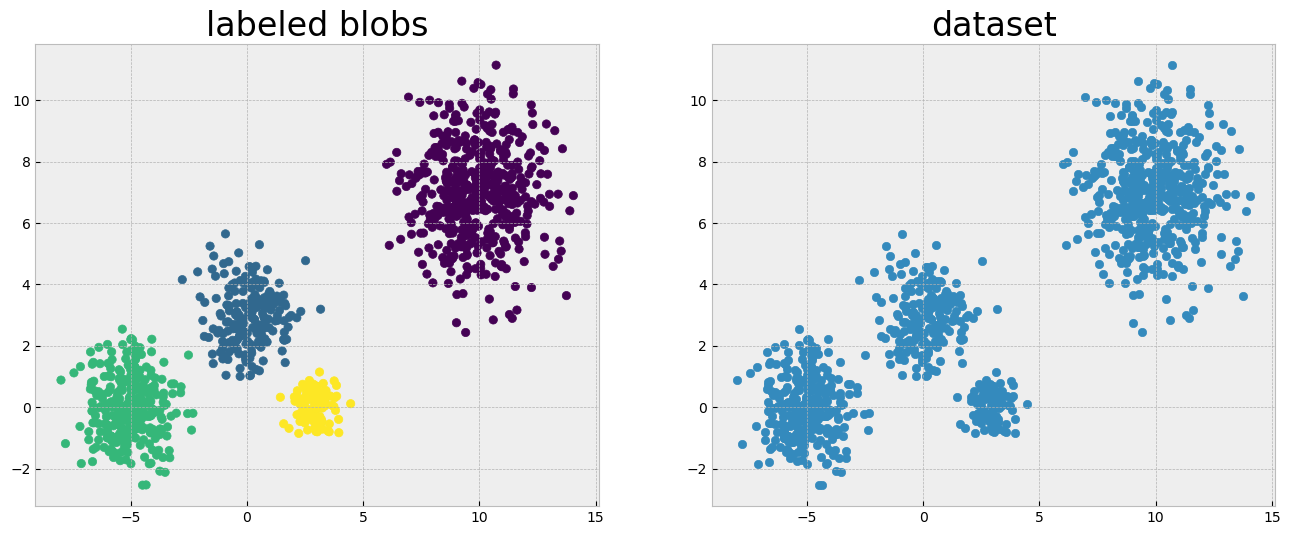

In [676]:
fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_blobs[:,0],X_blobs[:,1],c=y_blobs)
axs[0].set_title('labeled blobs', size=title_size)
axs[1].scatter(X_blobs[:,0],X_blobs[:,1])
axs[1].set_title('dataset', size=title_size);